## Importing Libraries

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Loading file

In [3]:
#loading the file
filename = 'clean_viral_meta.csv'
df = pd.read_csv(filename)

## Using .head() to see the first 5 rows

In [4]:
df.head()

,video_id,video_title,view_count,category,duration_in_seconds,upload_time,captured_time,avg_rate,max_rate,min_rate,num_raters,num_dislikes,num_likes,uploader_id,uploader_name,uploader_url,video_desp,percentage_of_likes,views_million
0,-_49VS4nuao,Elmo and Cookie Monster have some Adult Fun,1313791,Comedy,42,2008-12-28T21:57:55.000Z,01/18/13,4.921736,5.0,1.0,9864,193,9671,ZcSyg9WKALBO4r97-pjmAg,Dan Wilson,https://gdata.youtube.com/feeds/api/users/dani...,Discovered completely by accident by putting t...,98.043390,1.313791
1,-goXKtd6cPo,First Blog / Dorkiness Prevails,4484903,Film,95,2006-06-16T18:49:21.000Z,01/18/13,3.255860,5.0,1.0,10068,4390,5678,VEfyEuLJpgw_y4jSgV8Rtg,lonelygirl15,https://gdata.youtube.com/feeds/api/users/lone...,"So, I finally got a webcam and got it working ...",56.396504,4.484903
2,-HePTmrV-og,We Love You Maria Venus Raj 22 Philippines,3556190,Entertainment,253,2010-08-24T08:27:12.000Z,01/18/13,4.797153,5.0,1.0,16860,855,16005,u1TBcXNK29GvIwud6rVJQw,lexlib,https://gdata.youtube.com/feeds/api/users/lexlib,"We are only among many who went wild. Irina, M...",94.928826,3.556190
3,-kIJqXLMLwc,shiba inu white pupy 【超可愛い】【初公開】白柴くもくんの鳴き声,5914475,Animals,49,2009-09-19T05:53:24.000Z,01/18/13,4.959495,5.0,1.0,39007,395,38612,RL7_KwtbtYqACtAaWXA6Tw,okanouefamily,https://gdata.youtube.com/feeds/api/users/okan...,生まれて9日目のくもくんです。 Thank you for watching this mo...,98.987361,5.914475
4,-UaW6zYQDQE,Mariko Takahashi's Fitness Video,590989,Howto,210,2006-03-16T05:43:31.000Z,01/18/13,4.552616,5.0,1.0,1663,186,1477,ajte6UFGsKtxCvNabt26RQ,vinylboy20,https://gdata.youtube.com/feeds/api/users/viny...,This is a mesmerizing and frightening video. I...,88.815394,0.590989


## Checking our datatype

In [5]:
df.info()
#this is also helpful to see if there are any missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   video_id             446 non-null    object 
 1   video_title          446 non-null    object 
 2   view_count           446 non-null    int64  
 3   category             446 non-null    object 
 4   duration_in_seconds  446 non-null    int64  
 5   upload_time          446 non-null    object 
 6   captured_time        446 non-null    object 
 7   avg_rate             446 non-null    float64
 8   max_rate             446 non-null    float64
 9   min_rate             446 non-null    float64
 10  num_raters           446 non-null    int64  
 11  num_dislikes         446 non-null    int64  
 12  num_likes            446 non-null    int64  
 13  uploader_id          446 non-null    object 
 14  uploader_name        446 non-null    object 
 15  uploader_url         446 non-null    obj

## Scatterplots

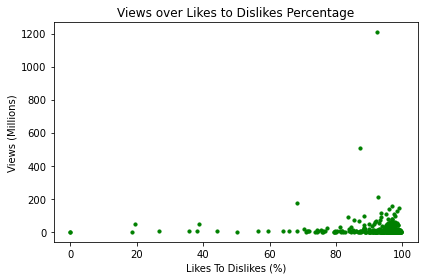

In [27]:
#matplotlib scatter plot

x = df.percentage_of_likes 
y = df.views_million
plt.scatter(x,y, s=10, c='green')
plt.xlabel('Likes To Dislikes (%)')
plt.ylabel('Views (Millions)')
plt.title('Views over Likes to Dislikes Percentage')
plt.tight_layout()

### This scatter plot is hard to look at because of the outliers who make it to zoomed out. 
### To make it clearer, a new scatter plot will be made without these outliers.

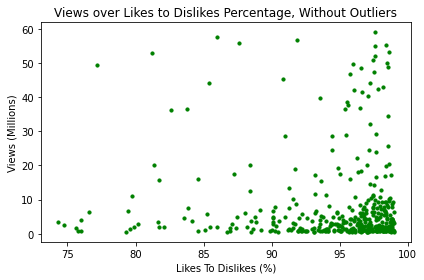

In [28]:
#removing outliers
x = df['percentage_of_likes']
removed_outliers1 = x.between(x.quantile(.05), x.quantile(.95))
y = df['views_million']
removed_outliers2 = y.between(y.quantile(.05), y.quantile(.95))
#doing a scatterplot
plt.scatter(x[removed_outliers1],y[removed_outliers2], s=10, c='green')
plt.xlabel('Likes To Dislikes (%)')
plt.ylabel('Views (Millions)')
plt.title('Views over Likes to Dislikes Percentage, Without Outliers')
plt.tight_layout()


## Boxplot
### Since many outliers were observable, I thought it would be interesting to do a boxplot

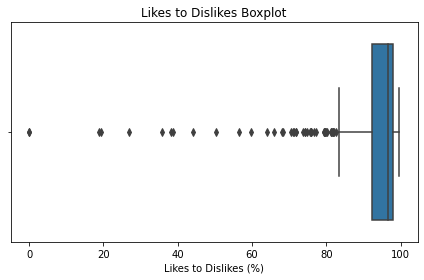

In [17]:
## boxplot of the 'percentage_of_likes' column
sns.boxplot(x='percentage_of_likes', data=df)
plt.suptitle("")
plt.xlabel('Likes to Dislikes (%)')
plt.title('Likes to Dislikes Boxplot')

plt.tight_layout()

Text(0.5, 1.0, 'Likes to Dislikes Boxplot by Category')

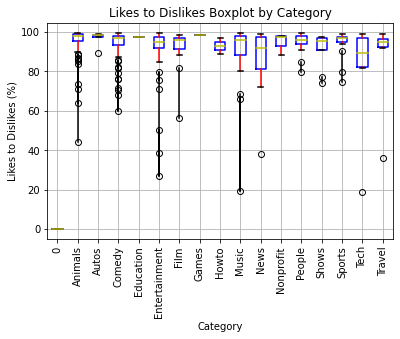

In [24]:
##boxplot of the 'ratio' column for each category
df.boxplot(column='percentage_of_likes', by ='category', color=dict(boxes='b', whiskers='r', medians='y', caps='k'),
             boxprops=dict(linestyle='-', linewidth=1.5),
             flierprops=dict(linestyle='-', linewidth=1.5),
             medianprops=dict(linestyle='-', linewidth=1.5),
             whiskerprops=dict(linestyle='-', linewidth=1.5),
             capprops=dict(linestyle='-', linewidth=1.5),
             showfliers=True, grid=True, rot=90)
plt.suptitle("")
plt.xlabel('Category')
plt.ylabel('Likes to Dislikes (%)')
plt.title('Likes to Dislikes Boxplot by Category')
